# Classification

## EDA and Preprocessing

In [1]:
# http://localhost:8888/notebooks/22-Deep%20Learning/TensorFlow_FILES/ANNs/02-Keras-Classification.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\Sergi\Desktop\Data_Science\22-Deep Learning\TensorFlow_FILES\DATA\cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


<AxesSubplot: xlabel='benign_0__mal_1', ylabel='count'>

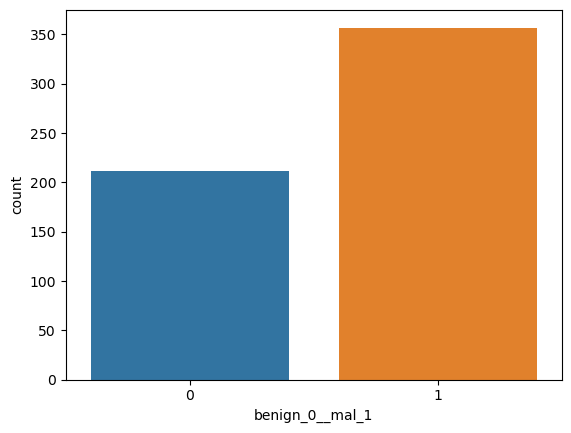

In [6]:
# EDA

sns.countplot(x='benign_0__mal_1', data=df)

In [7]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [8]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<AxesSubplot: >

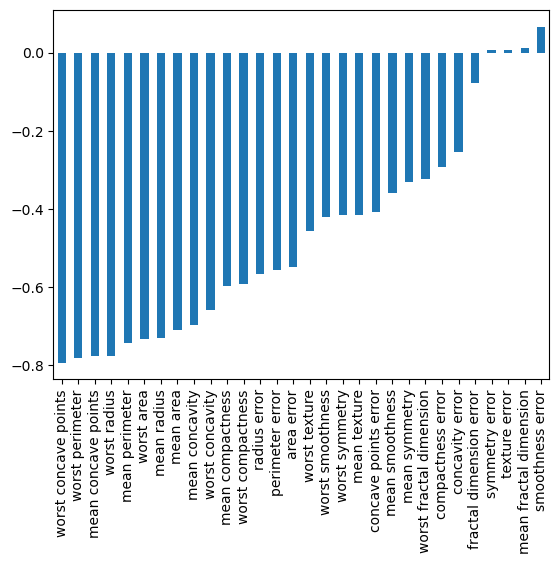

In [9]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar') 
# grab everything except the last one which is benign_0__mal_1 the target label, which would be perefectly correlated

<AxesSubplot: >

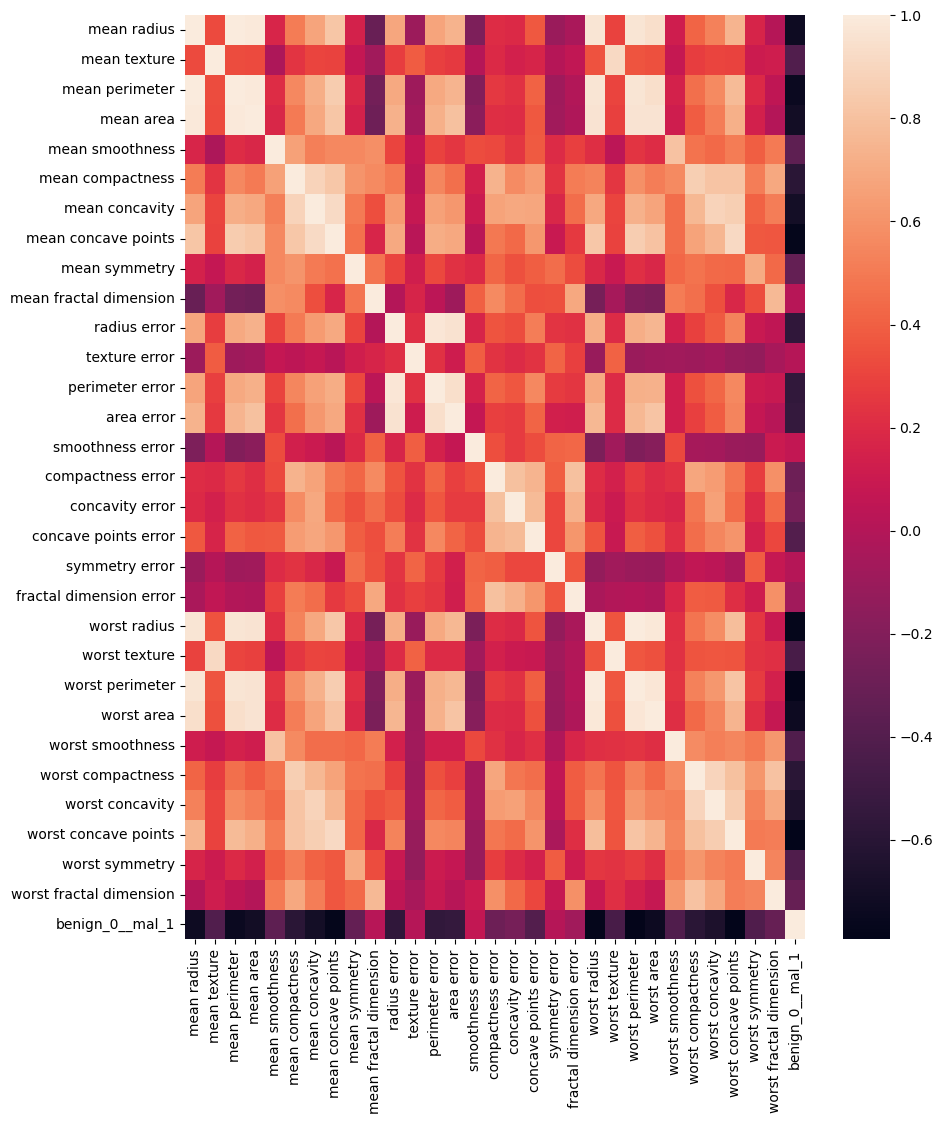

In [10]:
plt.figure(figsize=(10,12))
sns.heatmap(df.corr())

In [11]:
# train_test_split

from sklearn.model_selection import train_test_split

In [12]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
X_train = scaler.fit_transform(X_train)

In [16]:
X_test = scaler.transform(X_test)

## Creating a model - prevent overfitting and evaluation

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [19]:
X_train.shape

(426, 30)

In [20]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# The activation and this critical will be sigmoid because this is a binary classification problem:
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [21]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 1s 13ms/step - loss: 0.6826 - val_loss: 0.6734
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6519 - val_loss: 0.6461
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6176 - val_loss: 0.5994
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5671 - val_loss: 0.5440
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5138 - val_loss: 0.4903
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4617 - val_loss: 0.4357
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4097 - val_loss: 0.3868
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3664 - val_loss: 0.3422
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3253 - val_loss: 0.3048
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2938 - val_loss: 0.2755
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.0547 - val_loss: 0.1286
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0529 - val_loss: 0.1265
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0528 - val_loss: 0.1247
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0542 - val_loss: 0.1225
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0530 - val_loss: 0.1284
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0526 - val_loss: 0.1262
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0525 - val_loss: 0.1240
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0507 - val_loss: 0.1316
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0516 - val_loss: 0.1272
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0528 - val_loss: 0.1229
Epoch 93/600


14/14 [==============================] - 0s 3ms/step - loss: 0.0411 - val_loss: 0.1332
Epoch 165/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0399 - val_loss: 0.1355
Epoch 166/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0391 - val_loss: 0.1335
Epoch 167/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0382 - val_loss: 0.1290
Epoch 168/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0387 - val_loss: 0.1274
Epoch 169/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0390 - val_loss: 0.1246
Epoch 170/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0378 - val_loss: 0.1357
Epoch 171/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0379 - val_loss: 0.1270
Epoch 172/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0389 - val_loss: 0.1365
Epoch 173/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0390 - val_loss: 0.1295
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0278 - val_loss: 0.1378
Epoch 246/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0341 - val_loss: 0.1311
Epoch 247/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0298 - val_loss: 0.1354
Epoch 248/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0282 - val_loss: 0.1343
Epoch 249/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0377 - val_loss: 0.1439
Epoch 250/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0289 - val_loss: 0.1343
Epoch 251/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0268 - val_loss: 0.1329
Epoch 252/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0278 - val_loss: 0.1321
Epoch 253/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0294 - val_loss: 0.1340
Epoch 254/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0275 - val_loss: 0.1346
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0192 - val_loss: 0.1476
Epoch 327/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0209 - val_loss: 0.1641
Epoch 328/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0200 - val_loss: 0.1473
Epoch 329/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0225 - val_loss: 0.1528
Epoch 330/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0226 - val_loss: 0.1533
Epoch 331/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0207 - val_loss: 0.1457
Epoch 332/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0199 - val_loss: 0.1505
Epoch 333/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0218 - val_loss: 0.1446
Epoch 334/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0202 - val_loss: 0.1547
Epoch 335/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0225 - val_loss: 0.1440
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0139 - val_loss: 0.1690
Epoch 408/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0146 - val_loss: 0.1665
Epoch 409/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0136 - val_loss: 0.1684
Epoch 410/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0137 - val_loss: 0.1653
Epoch 411/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0143 - val_loss: 0.1660
Epoch 412/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0173 - val_loss: 0.1772
Epoch 413/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0138 - val_loss: 0.1635
Epoch 414/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0142 - val_loss: 0.1794
Epoch 415/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0126 - val_loss: 0.1666
Epoch 416/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0185 - val_loss: 0.1975
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0100 - val_loss: 0.1934
Epoch 489/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0096 - val_loss: 0.1965
Epoch 490/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0120 - val_loss: 0.1873
Epoch 491/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0093 - val_loss: 0.1937
Epoch 492/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0101 - val_loss: 0.1995
Epoch 493/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0107 - val_loss: 0.1845
Epoch 494/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0121 - val_loss: 0.1947
Epoch 495/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0097 - val_loss: 0.1880
Epoch 496/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0104 - val_loss: 0.1855
Epoch 497/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0096 - val_loss: 0.2175
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0052 - val_loss: 0.2339
Epoch 570/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.2298
Epoch 571/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0055 - val_loss: 0.2413
Epoch 572/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0048 - val_loss: 0.2300
Epoch 573/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0053 - val_loss: 0.2402
Epoch 574/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0059 - val_loss: 0.2374
Epoch 575/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0072 - val_loss: 0.2356
Epoch 576/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0063 - val_loss: 0.2414
Epoch 577/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0049 - val_loss: 0.2348
Epoch 578/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0048 - val_loss: 0.2404
Epoc

In [22]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot: >

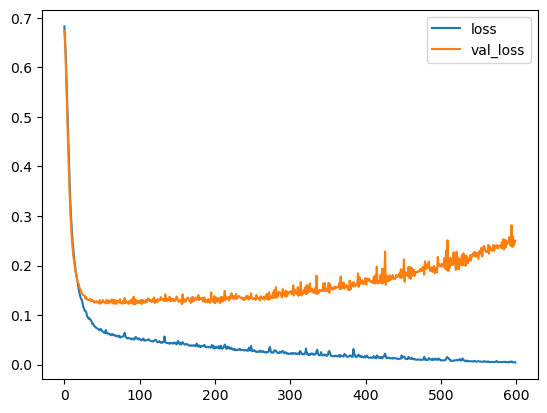

In [23]:
losses.plot()

In [24]:
# This is a perfect example of overfitting. In the beginning, during the first couple of epochs, both 
# validation and training loss are both decreasing. That's good.
# But, at certain point in time, our training loss (blue) is still going down. However, our validation loss (orange) 
# is beginning to increase.

# This tells us that we're overfitting to our training data set. This indicates, we're training for too many epochs.
# The validation loss gets worse and worse after these epochs.

In [25]:
# We're going to see if we can use early stopping.
# We use tensorflow.keras.callbacks to actually based on your validation loss, stop the training before it gets out of hand.

In [26]:
# Copy and paste the model again, cause we don't want to keep training on the same model:

model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# The activation and this critical will be sigmoid because this is a binary classification problem:
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False, start_from_epoch=0)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 

In [29]:
# We have to choose a metric to monitor and in our case it will be validation loss this orange metric right here.
# So we're going to be tracking that validation loss. And then you can also specify the minimum change required.
# Also, there's patience, which is the number of epochs with no improvement, after which training will be stopped.

In [31]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [35]:
# In our case, we're going to monitoring validation loss. And the mode that we're actually looking for is 'min'.
# The mode is basically What are you actually trying to do. So, here, we are trying to minimize the thing we're monitoring.
# If our metric was accuracy, we would want to maximize, 'max'. 
# But, if our metric is loss, essentially the reverse of accuracy, loss is something you want to minimize.
# And there's 'auto' that where the direction is automatically inferred from the name of the monitor quantity, 
# so ill infer it based off. This almost alwaysworks, but anyway, is recommended to put manually 'min' or 'max'.
# We're tracking our validation loss, which is what we want to minimize, 
# because if we have a loss of zero, that means we have a perfect fit.

In [32]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

# Is it's going to attempt to run on 600 epochs unless the early stop is triggered.
# And in this case, note that the early stop was triggered. The epoch has stopped at epoch 84.

Epoch 1/600
14/14 [==============================] - 1s 10ms/step - loss: 0.6848 - val_loss: 0.6567
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6365 - val_loss: 0.6072
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5858 - val_loss: 0.5519
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5346 - val_loss: 0.5010
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4841 - val_loss: 0.4489
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4308 - val_loss: 0.3954
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3818 - val_loss: 0.3494
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3424 - val_loss: 0.3085
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3119 - val_loss: 0.2778
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2810 - val_loss: 0.2576
Epoch 11

14/14 [==============================] - 0s 5ms/step - loss: 0.0524 - val_loss: 0.1012
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0528 - val_loss: 0.1032
Epoch 84: early stopping


<AxesSubplot: >

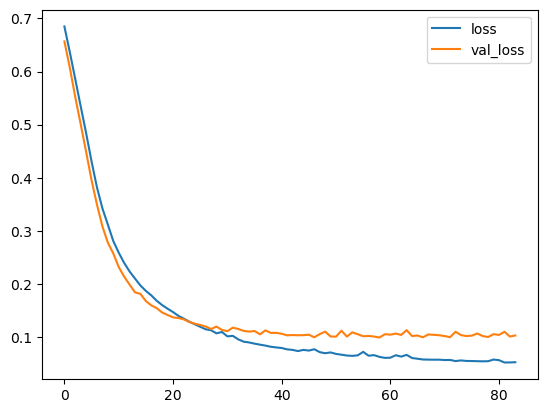

In [33]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [34]:
# This is exactly the kind of plot that we want to see where loss and validation loss are both beginning
# to go down and right as they begin to spread out, that's probably where a good indication of where
# we should stop training. Notice val_loss (orange) flattening out, that's ok behavior. 
# What we want to prevent is validation loss, beginning to increase.

In [36]:
# Another thing we can do, try to help prevent overfitting, is add in dropout layers.
# Dropout layers will turn off a percentage of neurons randomly.
# Copy and paste again my model:

from tensorflow.keras.layers import Dropout

model = Sequential()

model.add(Dense(30,activation='relu'))

# The rate is the probability that you're going to randomly turn off the actual neurons.
# So it's the fraction of which you're randomly turning them off:
model.add(Dropout(0.5)) 
# If you Dropout 0, means you're taking 0% of the neurons and randomly turning them off during training.
# If you Dropout 1, means that 100% of the neurons are going to be turned off randomly for each batch of training.
# But, would never Dropout 1. A really common value is somewhere between 0.2 and 0.5.
# This means, half the neurons during each batch (each batch is one entire epoch of training).
# In our case, because we haven't specified a batch size, half of those neurons in this layer of 30 (first layer)
# are going to be turned off. So their weights and biases won't be getting updated.

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
# Again, about half of these neurons are going to be turned off randomly. It's not the same neurons each time.
# It's a random sub selection of 50% of the neurons, so that each neuron has essentially a 50% probability
# of being turned off during each batch.

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')


In [37]:
# We can still retain the same early stopping, but we need to copy and paste the contents of the model that we fitted:

model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 11ms/step - loss: 0.7317 - val_loss: 0.7030
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6851 - val_loss: 0.6863
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6846 - val_loss: 0.6714
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6656 - val_loss: 0.6491
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6459 - val_loss: 0.6267
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6261 - val_loss: 0.6043
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6284 - val_loss: 0.5803
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5852 - val_loss: 0.5553
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5781 - val_loss: 0.5283
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5492 - val_loss: 0.5031
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.1153 - val_loss: 0.1080
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1073 - val_loss: 0.0943
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0957 - val_loss: 0.0931
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1048 - val_loss: 0.1004
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1075 - val_loss: 0.1069
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1235 - val_loss: 0.0948
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1129 - val_loss: 0.0913
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0897 - val_loss: 0.0921
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1027 - val_loss: 0.1036
Epoch 92/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1279 - val_loss: 0.0928
Epoch 93/600


In [38]:
# Notice it did run for a little bit longer and that's actually good because it means it's still learning
# even on those further epochs, and that's due to the fact of these dropout layers.

<AxesSubplot: >

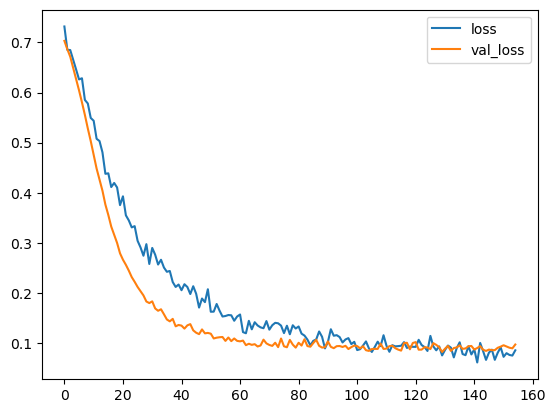

In [39]:
model_loss_dropout = pd.DataFrame(model.history.history)
model_loss_dropout.plot()

In [40]:
# This is even better behavior. The training loss and the validation loss are both quickly going down and they both
# are flattening out at the same rate. This is the kind of behavior we want to see. 
# Much improved vs original plot we saw earlier.

# So, adding in the early stopping and adding those dropout layers has significantly increased performance.

In [45]:
# Now we do a full evaluation on our classes, because we're performing a classification task.
# So we're predicting essentially either a zero or one:

predictions = (model.predict(X_test) > 0.5).astype("int32")
predictions
# It will end up showing the classes it predicts for the X_test dataset. Remember this just predict classes.

5/5 [==============================] - 0s 2ms/step


array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.99      0.95      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



In [50]:
# We're getting very good performance with 97% accuracy. Also good in recall and f1-score.
# Is a good metric because we saw that we had relatively balanced classes (we saw in the countplot).
# They weren't perfectly balanced, but they weren't extremely unbalanced either.

In [49]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 4 84]]


In [51]:
# The comparison of y_test vs our predictions shows that our network only misclassified five points in our test set.
# 1 False Positive (Type I Error) and 4 False Negative (Type II Error)